# <center> WASC calibration </center>

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-whitegrid")
from matplotlib.pyplot import figure
from importlib import reload
import sys
import src.Wishart.WASC
reload(src.Wishart.WASC)
from src.Wishart.WASC import calibrate_wasc, ModelParameters
from src.utils import process_data, round_params
import datetime
import warnings
warnings.filterwarnings("ignore")
import h5py
import matplotlib.dates as mdates
from tqdm.notebook import tqdm

In [2]:
%%time
raw = pd.HDFStore('datasets/eth-20230224.h5','r').get("/eth")
# raw2 = pd.HDFStore('../datasets/eth-20230127.h5','r').get("/eth")
# raw3 = pd.HDFStore('../datasets/eth-20230310.h5','r').get("/eth")
# raw = pd.concat([raw1, raw2, raw3]).drop_duplicates()
# raw.dt.hist(bins = 100)

CPU times: user 21.2 s, sys: 2.82 s, total: 24.1 s
Wall time: 25.6 s


In [3]:
%%time
df = process_data(raw)
df.head()

CPU times: user 48.9 s, sys: 14.5 s, total: 1min 3s
Wall time: 1min 11s


,dt,mark_price,instrument,type,strike_price,expiration,underlying_price,timestamp
0,2022-11-21 13:08:24.511,0.0005,ETH-25NOV22-1700-C,call,1700,1669334400000000,1133.9,1669036104511000
1,2022-11-21 13:08:24.511,0.0005,ETH-25NOV22-2400-C,call,2400,1669334400000000,1133.9,1669036104511000
2,2022-11-21 13:08:24.511,0.0020,ETH-25NOV22-700-P,put,700,1669334400000000,1133.9,1669036104511000
3,2022-11-21 13:08:24.511,0.0005,ETH-25NOV22-3800-C,call,3800,1669334400000000,1133.9,1669036104511000
4,2022-11-21 13:08:24.511,0.0005,ETH-25NOV22-3400-C,call,3400,1669334400000000,1133.9,1669036104511000


# Params dynamics

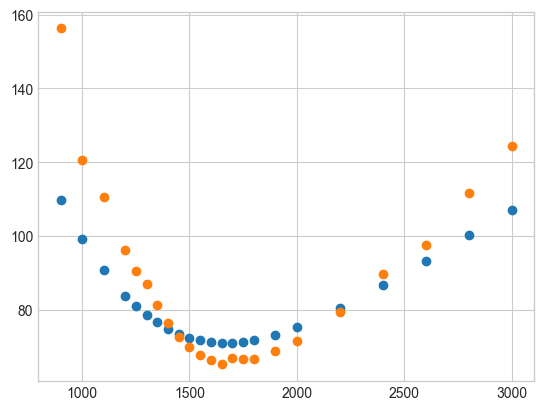

In [45]:
plt.scatter(first_res["strike_price"], first_res["calibrated_iv"])
plt.scatter(first_res["strike_price"], first_res["iv"])

In [58]:
calibrated_params_all

array([ 0.43038142,  0.79774923,  0.07737781,  0.34487682,  0.17218977,
       -0.3076329 ,  0.13543856, -0.89499041, -3.91552141, -0.46881025,
       -1.37374317])

In [99]:
%%time
number_of_dots = 300
timestamps_hm = []

params_all = []
errors_all = []

Q11, Q12, Q21, Q22, E11, Ed, E22, R11, R12, R21, R22 = 0.3417, 0.3493, 0.1848, 0.3090, 0.0298, 0.0119, 0.0108, -1.2479, -0.8985, -0.0820, -1.1433
start_params = np.array([Q11, Q12, Q21, Q22, E11, Ed, E22, R11, R12, R21, R22])

# Get ticks with similar distnce from available data
calibr_borders = df[(df["dt"] >= "2023-02-04") & (df["dt"] <= "2023-02-04 23:00:00")].copy()
df_only_exp = calibr_borders[calibr_borders["expiration"] == calibr_borders.sample(1).expiration.iloc[0]].copy()

print("Optimize first params with random start once")
# calibrated_params_all, first_error_all, first_res  = calibrate_wasc(df = df_only_exp, 
#                                                         start_params = start_params)


print("All first calibrated:", round_params(calibrated_params_all), "error:", first_error_all)
timestamps = np.linspace(calibr_borders.timestamp.min(), calibr_borders.timestamp.max(), number_of_dots)
for timestamp in tqdm(timestamps):
    try:
        # zero params for each point are params from last step
        calibrated_params_all, error_all, _  = calibrate_wasc(df = df_only_exp, start_params = calibrated_params_all, 
                                    timestamp = timestamp)
        print("All calibrated:", round_params(calibrated_params_all), "error:", error_all)


        params_all.append(calibrated_params_all)
        errors_all.append(error_all)
        timestamps_hm.append(timestamp)
    except:
        print("Error!")
        calibrated_params_all = start_params
        
        
        print("    ")

timestamps_hm = [datetime.datetime.fromtimestamp(x/1000000.0) for x in timestamps_hm]
params_all = np.array(params_all).T





Optimize first params with random start once
All first calibrated: [0.428, 0.801, 0.077, 0.347, 0.174, -0.308, 0.137, -0.894, -3.937, -0.47, -1.382] error: 0.02754381730869356


  0%|          | 0/300 [00:00<?, ?it/s]

Error!
    
All calibrated: [0.46, 1.074, 0.039, 0.393, 0.14, -0.261, 0.083, -0.88, -5.131, -0.623, -1.445] error: 0.023622178185216954
Error!
    
All calibrated: [0.402, 0.938, 0.067, 0.38, 0.168, -0.239, 0.099, -0.783, -6.093, -0.466, -1.643] error: 0.012513172204656968
Error!
    
All calibrated: [0.402, 0.977, 0.064, 0.383, 0.159, -0.227, 0.084, -0.784, -6.372, -0.473, -1.66] error: 0.01516387172856158
Error!
    
All calibrated: [0.409, 0.965, 0.066, 0.384, 0.165, -0.241, 0.094, -0.799, -5.828, -0.483, -1.626] error: 0.015699673928352097
Error!
    
All calibrated: [0.415, 0.989, 0.064, 0.388, 0.16, -0.241, 0.089, -0.813, -5.594, -0.499, -1.609] error: 0.018923451762709483
Error!
    
All calibrated: [0.411, 0.967, 0.065, 0.384, 0.164, -0.241, 0.093, -0.802, -5.82, -0.487, -1.621] error: 0.01593028591906496
All calibrated: [0.411, 0.967, 0.065, 0.384, 0.164, -0.241, 0.093, -0.802, -5.82, -0.487, -1.621] error: 0.015896753533539684
Error!
    
All calibrated: [0.405, 0.939, 0.066,

Error!
    
All calibrated: [0.29, 0.976, 0.067, 0.357, 0.207, -0.238, 0.125, -0.635, -6.001, -0.249, -1.823] error: 0.012320868892139817
All calibrated: [0.29, 0.976, 0.067, 0.357, 0.208, -0.238, 0.125, -0.635, -6.0, -0.249, -1.823] error: 0.012280796646272489
All calibrated: [0.29, 0.976, 0.067, 0.357, 0.208, -0.238, 0.125, -0.635, -6.0, -0.249, -1.823] error: 0.011261015980373263
All calibrated: [0.29, 0.976, 0.067, 0.357, 0.208, -0.238, 0.125, -0.635, -6.0, -0.249, -1.823] error: 0.011120722136924213
Error!
    
All calibrated: [0.298, 1.054, 0.062, 0.367, 0.189, -0.221, 0.102, -0.641, -6.404, -0.28, -1.835] error: 0.009621609090067368
All calibrated: [0.298, 1.053, 0.062, 0.367, 0.19, -0.222, 0.102, -0.64, -6.402, -0.279, -1.835] error: 0.01000751735745891
All calibrated: [0.298, 1.053, 0.062, 0.367, 0.19, -0.222, 0.102, -0.64, -6.401, -0.279, -1.836] error: 0.009927026056208111
All calibrated: [0.298, 1.053, 0.062, 0.367, 0.19, -0.222, 0.102, -0.64, -6.401, -0.279, -1.836] error:

Error!
    
All calibrated: [0.29, 1.042, 0.054, 0.374, 0.208, -0.229, 0.105, -0.642, -5.998, -0.312, -1.866] error: 0.01254941651052242
All calibrated: [0.29, 1.042, 0.054, 0.374, 0.208, -0.229, 0.105, -0.642, -5.998, -0.312, -1.866] error: 0.012373113098794327
All calibrated: [0.29, 1.042, 0.054, 0.374, 0.208, -0.229, 0.105, -0.642, -5.998, -0.312, -1.866] error: 0.012789480694949205
All calibrated: [0.289, 1.042, 0.054, 0.374, 0.208, -0.229, 0.105, -0.642, -5.997, -0.312, -1.866] error: 0.012875223843408619
All calibrated: [0.289, 1.042, 0.054, 0.374, 0.208, -0.229, 0.105, -0.642, -5.997, -0.312, -1.866] error: 0.0127526831522669
All calibrated: [0.289, 1.042, 0.054, 0.374, 0.208, -0.229, 0.105, -0.642, -5.997, -0.312, -1.866] error: 0.012584423632567291
Error!
    
All calibrated: [0.289, 1.052, 0.054, 0.374, 0.187, -0.22, 0.094, -0.638, -6.056, -0.313, -1.88] error: 0.011131313288528472
Error!
    
All calibrated: [0.288, 1.038, 0.055, 0.371, 0.189, -0.222, 0.097, -0.638, -5.991, 

CPU times: user 23.3 s, sys: 288 ms, total: 23.6 s
Wall time: 23.5 s


In [101]:
len(timestamps_hm)

188

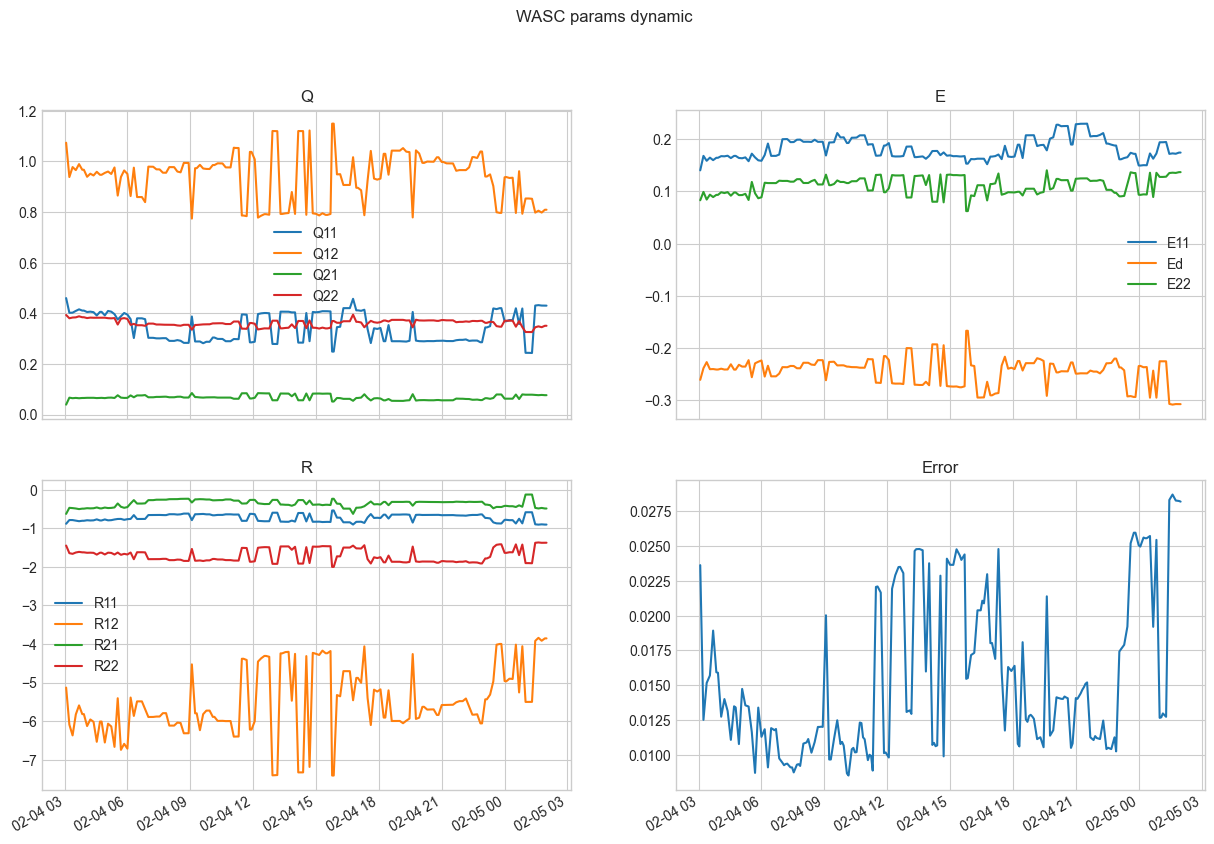

In [100]:
fig, axs =  plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

axs[0, 0].plot(timestamps_hm, params_all[0], label = "Q11")
axs[0, 0].plot(timestamps_hm, params_all[1], label = "Q12")
axs[0, 0].plot(timestamps_hm, params_all[2], label = "Q21")
axs[0, 0].plot(timestamps_hm, params_all[3], label = "Q22")
axs[0, 0].legend()

axs[0, 1].plot(timestamps_hm, params_all[4], label = "E11")
axs[0, 1].plot(timestamps_hm, params_all[5], label = "Ed")
axs[0, 1].plot(timestamps_hm, params_all[6], label = "E22")
axs[0, 1].legend()

axs[1, 0].plot(timestamps_hm, params_all[7], label = "R11")
axs[1, 0].plot(timestamps_hm, params_all[8], label = "R12")
axs[1, 0].plot(timestamps_hm, params_all[9], label = "R21")
axs[1, 0].plot(timestamps_hm, params_all[10], label = "R22")
axs[1, 0].legend()

axs[1, 1].plot(timestamps_hm, errors_all, label = "R22")


axs[0, 0].set_title(r"Q")
axs[0, 1].set_title(r"E")
axs[1, 0].set_title(r"R")
axs[1, 1].set_title(r"Error")



# plt.figlegend() 
fig.suptitle("WASC params dynamic")
plt.gcf().autofmt_xdate()
plt.show()

# Volatility smile

In [117]:
df_only_exp = df[df["expiration"] == df.sample(1).expiration.iloc[0]].copy()
needed_stamp = df_only_exp.sample(1).iloc[0].timestamp

In [118]:
Q11, Q12, Q21, Q22, E11, Ed, E22, R11, R12, R21, R22 = 0.3417, 0.3493, 0.1848, 0.3090, 0.0298, 0.0119, 0.0108, -1.2479, -0.8985, -0.0820, -1.1433
start_params = np.array([Q11, Q12, Q21, Q22, E11, Ed, E22, R11, R12, R21, R22])

pars_all, err_all, C_all = calibrate_wasc(df = df_only_exp, 
                                          start_params = start_params, 
                                          timestamp = needed_stamp,)



print("All:")
print(round_params(pars_all))
print(err_all)
print("   ")



All:
[0.459, 1.132, 0.026, 0.475, 0.323, -0.545, 0.273, -1.058, -3.697, -0.886, -1.355]
0.014620884136849274
   


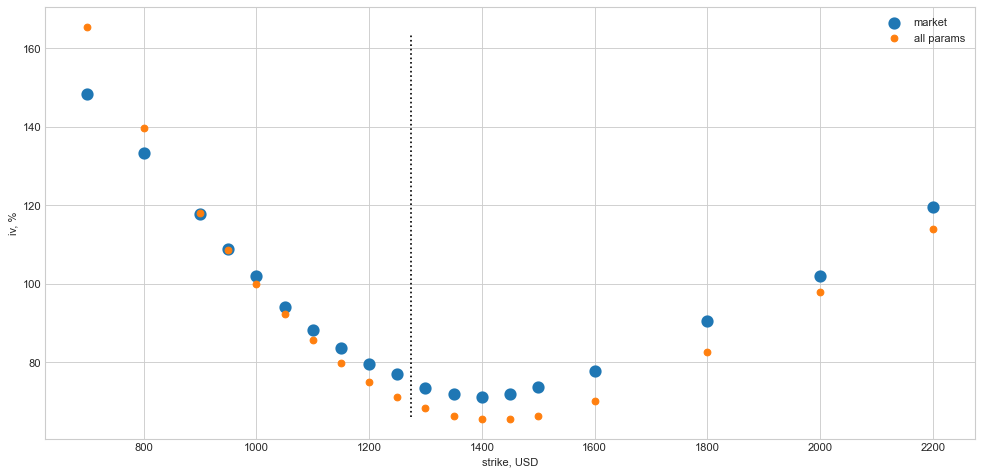

In [119]:
figure(figsize=(15, 7), dpi=80)

plt.scatter(C_all["strike_price"], C_all["iv"], label = "market", linewidths = 5)

# bid,ask iv
# plt.plot(C_sing_exp_all["strike_price"], C_sing_exp_all["ask_iv"], '--', label = "ask_iv", color = "black")
# plt.plot(C_sing_exp_all["strike_price"], C_sing_exp_all["bid_iv"], '--', label = "bid_iv", color = "yellow")

plt.scatter(C_all["strike_price"], C_all["calibrated_iv"], label = "all params")
# plt.scatter(C_beta["strike_price"], C_beta["calibrated_iv"], label = r"$\beta$")


plt.vlines([C_all.underlying_price.mean()], C_all.iv.min() - 5, 
           C_all.iv.max() + 15, color = "black", linestyles = "dotted")

plt.xlabel("strike, USD")
plt.ylabel("iv, %")
plt.legend()
plt.show()